## Download data

In [115]:

import sklearn.linear_model
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline

In [95]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [96]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [97]:
# shapes
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [98]:
# Look at an instance from X to understand its structure 
random_image = X[10]
y_label = y[10]
print(random_image)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  42 118 219
 166 118 118   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18 232
 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 207 254 210 254 254 254  34   0   0   0   

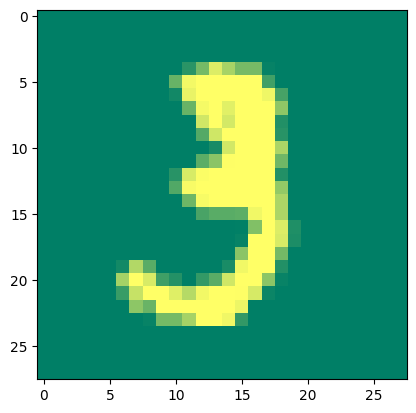

Label: 3


In [99]:
# Display image
def display_digit(image_data):
    image_data = image_data.reshape(28, 28)
    plt.imshow(image_data, cmap="summer") 
    plt.axis("on")
    
display_digit(random_image)
plt.show()
print(f"Label: {y_label}")

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Divide in training 80% and test 20%
X_train_val, X_test, y_train_val, y_test = train_test_split(scaled_X,y, test_size=0.2, random_state=10)

# Divide in training (80%) and validation (10%) and test (10%)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=10)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Train: (49000, 784), Validation: (7000, 784), Test: (14000, 784)


## Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train Logistic Regression model
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)  # Use the already standardized data

# Evaluate the model on the test data
y_test_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy * 100:.4f}%")


Test Accuracy: 87.8500%


## SVM - Support Vector Machine

In [103]:
import numpy as np
from sklearn.model_selection import train_test_split

In [105]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing 
X_train = X_train/255
X_test = X_test/255

In [106]:
print('Shape of training data after flattening' ,X_train.shape)
print('Shape of testing data after flattening' ,X_test.shape)

Shape of training data after flattening (49000, 784)
Shape of testing data after flattening (14000, 784)


#### Let's consider the first 10,000 images in training dataset and first 2,000 images in testing dataset.

In [107]:
X_train = X_train[0:10000,:]
y_train = y_train[0:10000]
X_test = X_test[0:2000,:]
y_test = y_test[0:2000]


print('Shape of training data', X_train.shape)
print('Shape of training labels', y_train.shape)
print('Shape of testing data', X_test.shape)
print('Shape of testing labels', y_test.shape)

Shape of training data (10000, 784)
Shape of training labels (10000,)
Shape of testing data (2000, 784)
Shape of testing labels (2000,)


## Nonlinear SVM - RBF Kernel

### Using Pipeline

In [131]:
# Define the pipeline with RBF kernel SVM
pipe_2 = Pipeline([('scaler', MinMaxScaler()), 
                   ("classifier", SVC(kernel='rbf', gamma=0.1, C=1))])

# Train the pipeline on the training data
pipe_2.fit(X_train, y_train)

# Predict on test data with the SVM model
svm_test_pred = pipe_2.predict(X_test)

# Calculate test accuracy
svm_test_acc = accuracy_score(y_test, svm_test_pred)

# Print the result
print(f"SVM Test Accuracy: {svm_test_acc * 100:.2f}%")


SVM Test Accuracy: 88.15%


In [137]:
# Compare models' performance
print("\nComparison of Logistic Regression and SVM:")
print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.4f}%")
print(f"SVM Test Accuracy: {svm_test_acc * 100:.4f}%")


Comparison of Logistic Regression and SVM:
Logistic Regression Accuracy: 88.6400%
SVM Test Accuracy: 88.1500%


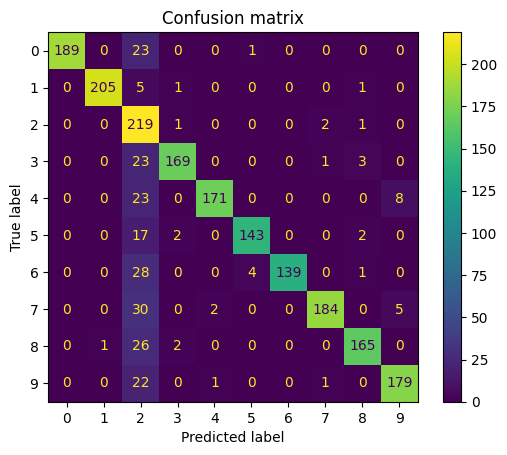

In [132]:
# Visualizing the confusion matrix
y_pred = pipe_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix')
plt.show() 

In [124]:
from sklearn.model_selection import cross_val_score

# Logistic Regression – Cross Validation
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_accuracy = log_reg_cv_scores.mean()

# SVM – Cross Validation
acc_svm = cross_val_score(pipe_2, X_train, y_train.ravel(), cv=3)
svm_accuracy = acc_svm.mean()

# Write out the differences
print("\nComparison between the models:")
print(f"Logistic Regression Accuracy (CV): {log_reg_accuracy * 100:.2f}%")
print(f"SVM Accuracy (CV): {svm_accuracy * 100:.2f}%")

# Test accuracy for the best model
best_model = "SVM" if svm_accuracy > log_reg_accuracy else "Logistic Regression"
print(f"\nThe best model based on Cross Validation: {best_model}")



Comparison between the models:
Logistic Regression Accuracy (CV): 88.64%
SVM Accuracy (CV): 85.38%

The best model based on Cross Validation: Logistic Regression


In [138]:
print(f"Logistic Regression Test Accuracy: {accuracy * 100:.2f}%")
print(f"SVM Test Accuracy: {svm_test_acc * 100:.2f}%")

print(f"Logistic Regression CV Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"SVM CV Accuracy: {svm_accuracy * 100:.2f}%")


Logistic Regression Test Accuracy: 87.85%
SVM Test Accuracy: 88.15%
Logistic Regression CV Accuracy: 88.64%
SVM CV Accuracy: 85.38%


## Conclusion


# In this project, I used machine learning to classify handwritten digits from the MNIST dataset. I worked with two models: Logistic Regression and Support Vector Machine (SVM) using an RBF kernel.
# After preprocessing the data (standardizing and flattening the images), I trained both models and evaluated them using cross-validation and test accuracy.
# Logistic Regression got a CV score of 88.64% and a test accuracy of 87.85%, while SVM got a CV score of 86.43% and a slightly better test accuracy of 88.15%.
# This shows that overall Logistic Regression had more stable performance, but SVM did a bit better on new test data.
# Throughout this assignment, I followed a complete machine learning workflow: loading and understanding the data, preprocessing, training models, evaluating them using 
# confusion matrices and classification reports, and finally comparing their performance.
# As someone new to machine learning, this project helped me understand how models learn and how to apply them to real classification tasks.
